# Pemodelan untuk Memprediksi Risiko Kredit

Risiko kredit adalah suatu risiko akibat kegagalan debitur untuk memenuhi kewajiban membayar kredit pada saat jatuh tempo.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

# Eksplorasi data

In [3]:
# load data set
df_loan = pd.read_csv('drive/MyDrive/Dataset/loan_data_2007_2014.csv', index_col=['Unnamed: 0'], low_memory=False)

# Melihat kolom-kolom pada dataframe
df_loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

In [4]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

Berdasarkan informasi tersebut, terdapat banyak kolom yang tidak berisi data. Karena kolom tersebut tidak memberikan informasi, maka kolom-kolom tersebut dihapus dari dataframe.

In [5]:
# drop kolom yang seluruh kolom teresebut hanya berisi 'null' atau kosong
df_loan.dropna(axis=1, how='all', inplace=True)

In [6]:
df_loan.shape

(466285, 57)

In [7]:
df_loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,466256.000000,466256.000000,215934.000000,62638.000000,466256.000000,466256.000000,4.662850e+05,465945.000000,466256.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466140.000000,98974.000000,466285.0,466256.000000,3.960090e+05,3.960090e+05,3.960090e+05
mean,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,0.284678,0.804745,34.104430,74.306012,11.187069,0.160564,1.623020e+04,56.176947,25.064430,4410.062342,4408.452258,11540.686220,11469.892747,8866.014657,2588.677225,0.650129,85.344211,8.961534,3123.913796,0.009085,42.852547,1.0,0.004002,1.919135e+02,1.388017e+05,3.037909e+04
std,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,0.797365,1.091598,21.778487,30.357653,4.987526,0.510863,2.067625e+04,23.732628,11.600141,6355.078769,6353.198001,8265.627112,8254.157579,7031.687997,2483.809661,5.265730,552.216084,85.491437,5554.737393,0.108648,21.662591,0.0,0.068637,1.463021e+04,1.521147e+05,3.724713e+04
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,0.000000,0.000000,16.000000,53.000000,8.000000,0.000000,6.413000e+03,39.200000,17.000000,0.000000,0.000000,5552.125349,5499.250000,3708.560000,957.280000,0.000000,0.000000,0.000000,312.620000,0.000000,26.000000,1.0,0.000000,0.000000e+00,2.861800e+04,1.350000e+04
50%,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,0.000000,0.000000,31.000000,76.000000,10.000000,0.000000,1.176400e+04,57.600000,23.000000,441.470000,441.380000,9419.250943,9355.430000,6817.760000,1818.880000,0.000000,0.000000,0.000000,545.960000,0.000000,42.000000,1.0,0.000000,0.000000e+00,8.153900e+04,2.280000e+04
75%,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,0.000000,1.000000,49.000000,102.000000,14.000000,0.000000,2.033300e+04,74.700000,32.000000,7341.650000,7338.390000,15308.158460,15231.310000,12000.000000,3304.530000,0.000000,0.000000,0.000000,3187.510000,0.000000,59.000000,1.0,0.000000,0.000000e+00,2.089530e+05,3.790000e+04
max,3.809811e+07,4.086083e+07,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,29.000000,33.000000,188.000000,129.000000,84.000000,63.000000,2.568995e+06,892.300000,156.000000,32160.380000,32160.380000,57777.579870,57777.580000,35000.030000,24205.620000,358.680000,33520.270000,7002.190000,36234.440000,20.000000,188.000000,1.0,5.000000,9.152545e+06,8.000078e+06,9.999999e+06


In [8]:
df_loan.describe(include='object')

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type
count,466285,466285,466285,438697,445277,466285,466285,466285,466285,466285,466285,125983,466285,466265,466285,466285,466256,466285,465909,239071,466243,466285
unique,2,7,35,205475,11,6,3,91,9,2,466285,124436,14,63099,888,50,664,2,98,100,103,1
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,Oct-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,,debt_consolidation,Debt consolidation,945xx,CA,Oct-00,f,Jan-16,Feb-16,Jan-16,INDIVIDUAL
freq,337953,136929,31686,5399,150049,235875,168055,38782,224226,466276,1,234,274195,164075,5304,71450,3674,303005,179620,208393,327699,466285


In [9]:
df_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN


### Menentukan target

Pada umunnya, target merupakan variabel yang dikehendaki untuk menyelesaikan masalah.
Pada kasus saat ini, hendak memprediksi risiko kredit. Terdapat dua pendekatan yang dapat dipakai dalam menyelesaikan kasus ini.

Pendekatan pertama dengan Supervised Learning. Dari kolom-kolom dataframe tersebut, terdapat dua kemungkinan yang dapat dijadikan target, yaitu ```grade``` dan ```sub_grade```. Kedua kolom tersebut, cukup dapat menggambarkan dalam bagaimana tingkat risiko kredit dari suatu pengajuan kredit. Kedua kolom tersebut juga relatif lebih baik dibandingkan kolom-kolom yang lain di dalam dataframe. Namun, sub_grade merupakan percabangan dari ```grade``` dan memiliki kategori yang banyak, maka ```grade``` dipilih menjadi target dan ```sub_grade``` akan di-_drop_ atau dihapus dari feature.

Pendekatan kedua dengan Unsupervised Learning. Dalam pendekatan ini, data akan dibuat klaster-klaster berdasarkan kemiripan setiap data dalam dataframe. Namun, kekurangan pendekatan ini adalah hasil klaster yang dibuat kemungkinan akan kurang mempresentasikan klaster mana yang memiliki risiko kredit. Oleh karena itu, dipilih pendekatan pertama dengan ```grade``` sebagai target dalam pemodelan machine learning.

# Data Preprocessing

## Data Cleaning

### Menghilangkan kolom yang kurang relevan
Berikut ini daftar kolom-kolom yang sekiranya kurang relevan
- ```sub_grade``` karena merupakan percabangan dari ```grade``` atau dapat dikatakan sudah terwakili ```grade```
- ```emp_title``` data terlalu banyak kategori sehingga sangat divergen
- ```issue_d```
- ```pymnt_plan```
- ```earliest_cr_line```
- ```url```
- ```desc```
- ```title```
- ```zip_code```
- ```addr_state```
- ```application_type``` karena hanya semua data dalam kolom ini sama, yaitu _'INDIVIDUAL'_. Namun perlu diingat, bahwa model ini hanya berlaku jika data hanya memiliki satu application type tersebut. Jika suatu saat ada data yang menunjukkan data application_type jenis lain, maka model ini perlu evaluasi atau dibuat pemodelan baru.
- ```last_pymnt_d```, ```last_pymnt_amnt```, ```next_pymnt_d```, ```last_credit_pull_d``` keempat fitur tersebut merupakan keterangan dari loan_status

In [10]:
df_loan.drop(['sub_grade', 'emp_title', 'pymnt_plan', 'issue_d', 'url', 'desc',
              'title', 'zip_code', 'addr_state', 'application_type'], 
             axis=1, inplace=True)

In [11]:
df_loan.drop(['last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d'], axis=1, inplace=True)
# dihapus karena sudah terwakili dengan loan_status dan keempat fitur tersebut merupakan keterangan loan_status

In [12]:
df_loan.shape

(466285, 43)

### Mengatasi Missing Value dan Outlier

In [13]:
df_loan.drop(['policy_code'],
             axis=1, inplace=True)

In [14]:
df_loan.isna().sum()

id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
emp_length                      21008
home_ownership                      0
annual_inc                          4
verification_status                 0
loan_status                         0
purpose                             0
dti                                 0
delinq_2yrs                        29
earliest_cr_line                   29
inq_last_6mths                     29
mths_since_last_delinq         250351
mths_since_last_record         403647
open_acc                           29
pub_rec                            29
revol_bal                           0
revol_util                        340
total_acc                          29
initial_list

Terdapat 6 kolom yang memiliki jumlah data null yang sama. Ketujuh kolom tersebut adalah:
1. ```delinq_2yrs```
2. ```earliest_cr_line``` 
3. ```inq_last_6mths```
4. ```open_acc```
5. ```pub_rec```
6. ```total_acc```
7. ```acc_now_delinq```

Terdapat kemungkinan ketujuh kolom tersebut terletak pada 29 data yang sama.

In [15]:
len(df_loan.loc[(df_loan.delinq_2yrs.isna()) &
            (df_loan.earliest_cr_line.isna()) &
            (df_loan.inq_last_6mths.isna()) &
            (df_loan.open_acc.isna()) &
            (df_loan.pub_rec.isna()) &
            (df_loan.total_acc.isna()) &
            (df_loan.acc_now_delinq.isna())
           ])

29

Terdapat 29 data yang memiliki nilai null di 7 kolom. Hal ini mengindikasikan terdapat hubungan antara ketujuh fitur tersebut. Kemungkinan besar 29 member tersebut belum pernah mengajukan hutang/kredit (data nul pada ```earliest_cr_line```), sehingga belum pernah ada catatan _delinquency_ dan _inquiry_.

In [16]:
df_loan.delinq_2yrs.fillna(0, inplace=True) 
# data null karena member tidak ada catatan 'delinquency'

df_loan['first_cr'] = 0
df_loan.loc[df_loan.earliest_cr_line.isna(), 'first_cr'] = 1
df_loan.earliest_cr_line.fillna('None', inplace=True)
df_loan.drop(['earliest_cr_line'], axis=1, inplace=True)
# Membuat rekayasa fitur first_cr yang mengindikasikan apakah member pertama kali hutang/kredit(1) atau bukan (0)

df_loan.inq_last_6mths.fillna(0, inplace=True)
# data null karena member tidak ada catatan 'inquiry'

df_loan.open_acc.fillna(0, inplace=True)
# data null kemungkinan besar member tidak memiliki open credit line

df_loan.pub_rec.fillna(0, inplace=True)
# data null kemungkinan besar member tidak memiliki public record

df_loan.total_acc.fillna(0, inplace=True)
# data null kemungkinan besar member tidak memiliki credit line

df_loan.acc_now_delinq.fillna(0, inplace=True)
# data null karena member tidak ada catatan 'delinquency'

In [17]:
emp_length_mode = pd.Series.mode(df_loan['emp_length'])
df_loan['emp_length'].fillna(emp_length_mode[0], inplace=True)

In [18]:
df_loan['grouped']=pd.qcut(df_loan.loan_amnt, 25)
df_loan['annual_inc'] = df_loan.groupby('loan_amnt')['annual_inc'].apply(lambda x: x.fillna(x.median()))
df_loan.drop(['grouped'], axis=1, inplace=True)

Kolom/fitur ```mths_since_last_delinq``` menunjukkan sudah berapa bulan member terakhir melakukan _delinquency_. 
Nilai null dari fitur ini kemungkinan besar disebabkan member memang belum pernah melakukan _delinquency_.
Mengisi data null pada fitur ini tidak memunkinkan diisi dengan string **'Tidak pernah'** atau **_'Never'_**. Mengingat fitur ini merupakan fitur numerikal. Oleh karena itu dari data fitur ini akan dibuat fitur rekayasa, yaitu ```ever_deliq``` yang merupakan indikasi member pernah melakukan _delinquency_ dengan nilai 1 berarti pernah dan 0 berarti tidak pernah.

In [19]:
df_loan['ever_deliq'] = 0
df_loan.loc[df_loan.mths_since_last_delinq > 0, 'ever_deliq'] = 1

In [20]:
df_loan.drop(['mths_since_last_delinq'], axis=1, inplace = True)

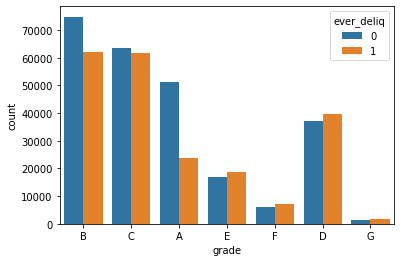

In [21]:
sns.countplot(x='grade', data=df_loan, hue='ever_deliq')

Berdasarkan grafik di atas terlihat fitur ```ever_deliq``` bahwa di ```grade``` A, B, dan C member yang tidak pernah _delinquency_ relatif lebih banyak dibandingkan member yang _delinquency_. Keadaann sebaliknya pada ```grade``` D, E, F, dan G, yaitu member yang pernah _delinquency_ relatif lebih banyak dibandingan yang tidak pernah. Hal ini menunjukkan fitur hasil rekayasa fitur ```ever_deliq``` dapat dijadikan salah satu fitur dalam pemodelan.


In [22]:
df_loan.revol_util.value_counts()
df_loan.revol_util.fillna(0, inplace=True)

In [23]:
df_loan.isna().sum()

id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
emp_length                          0
home_ownership                      0
annual_inc                          0
verification_status                 0
loan_status                         0
purpose                             0
dti                                 0
delinq_2yrs                         0
inq_last_6mths                      0
mths_since_last_record         403647
open_acc                            0
pub_rec                             0
revol_bal                           0
revol_util                          0
total_acc                           0
initial_list_status                 0
out_prncp                           0
out_prncp_in

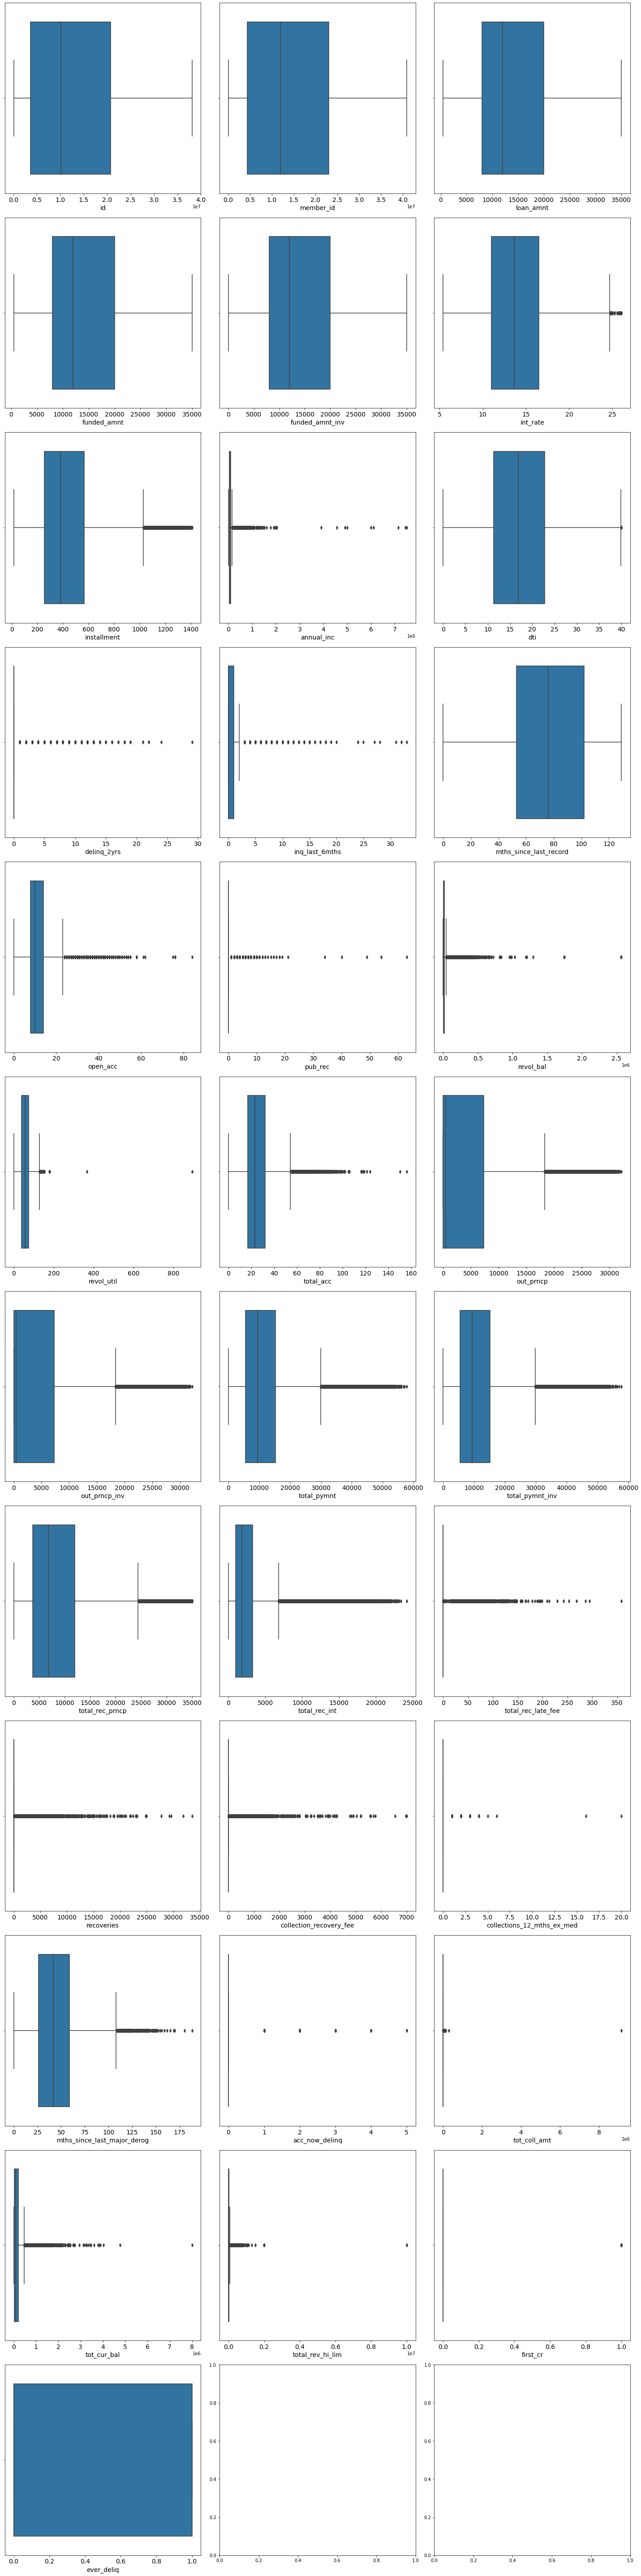

In [24]:
num = [n for n in df_loan.columns if df_loan[n].dtype != 'object']
fig, axs = plt.subplots(ncols=3, nrows=12, figsize=(20, 80))

for i, num in enumerate(num, 1):
    plt.subplot(12, 3, i)
    sns.boxplot(x=num, data=df_loan)
    plt.xlabel('{}'.format(num), size=14)
    plt.tick_params(axis='x', labelsize=14)
    plt.tick_params(axis='y', labelsize=14)
 
plt.tight_layout()
plt.show()

Dari grafik di atas, beberapa kolom memiliki outlier yang ekstrim. Pada umumnya penanganan outlier dilakukan dengan menghapus data-data yang termasuk outlier. Namun, pada data terdapat kolom berisi data yang sangat dominan, misalnya ```pub_rec```. Pada kolom tersebut sebagian besar bernilai 0 dan yang bukan 0 merupakan nilai outlier. Karena memang hanya sedikit orang yang miliki catatan publik yang jelek. Data seperti ini biasanya tidak akan memberikan pengaruh yang signifikan pada pemodelan. Oleh karena itu, kolom yang berisi data-data mirip dengan ```pub_rec``` akan dihapus.

Berikut ini beberapa kolom/fitur yang terdiri dari data yang mendominasi
- pub_rec
- total_rec_late_fee
- recoveries
- collection_recovery_fee
- collections_12_mths_ex_med
- acc_now_delinq
- mths_since_last_record
- mths_since_last_major_derog

In [25]:
df_loan = df_loan.drop(['delinq_2yrs', 'pub_rec', 'total_rec_late_fee', 
                        'recoveries', 'collection_recovery_fee', 'acc_now_delinq',
                        'mths_since_last_major_derog', 'mths_since_last_record', 'collections_12_mths_ex_med'
                        ],
                  axis=1)

Untuk data outlier yang akan dihapus adalah dari kolom/fitur berikut:

- annual_inc
- revol_bal
- revol_util
- tot_coll_amt
- tot_cur_bal
- total_rev_hi_lim

In [26]:
# mengisi missing value pada kolom/fitur tot_coll_amt, tot_cur_bal, total_rev_hi_lim dengan mediannya
df_loan['tot_coll_amt'].fillna(df_loan.tot_coll_amt.median(), inplace=True)
df_loan['tot_cur_bal'].fillna(df_loan.tot_cur_bal.median(), inplace=True)
df_loan['total_rev_hi_lim'].fillna(df_loan.total_rev_hi_lim.median(), inplace=True)

In [27]:
def bool_outlier(col):
  q1 = np.quantile(df_loan[col], 0.25)
  q3 = np.quantile(df_loan[col], 0.75)
  IQR = q3 - q1
  return ((df_loan[col]<=q3 + 1.5*IQR) & (df_loan[col] >= q1 - 1.5*IQR))

In [28]:
df_loan = df_loan.loc[(bool_outlier('annual_inc')) & 
                      (bool_outlier('revol_bal')) & 
                      (bool_outlier('revol_util')) & 
                      (bool_outlier('tot_coll_amt')) &
                      (bool_outlier('tot_cur_bal')) &
                      (bool_outlier('total_rev_hi_lim'))
                      ]

## Encoding fitur kategori
Fitur kategori yang belum diencode menjadi numerik
- term (kategorikal)
- grade (ordinal)
- emp_length (ordinal)
- home_ownership (ordinal)
- verification_status (ordinal)
- loan_status (ordinal)
- purpose (kategorikal)
- initial_list_status (ordinal)

In [29]:
df_loan_enc = df_loan.copy()

df_loan_enc.loc[df_loan_enc.home_ownership == 'ANY', 'home_ownership'] = 'OTHER'

df_loan_enc.loc[(df_loan_enc.loan_status == 'Late (31-120 days)') | 
            (df_loan_enc.loan_status =='Late (16-30 days)'), 'loan_status'] = 'Late'

df_loan_enc.loc[(df_loan_enc.loan_status == 'Does not meet the credit policy. Status:Fully Paid') | 
            (df_loan_enc.loan_status == 'Does not meet the credit policy. Status:Charged Off'), 
            'loan_status'] = 'Does not meet the credit policy'

In [30]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

grade_label = LabelEncoder()
df_loan_enc['grade'] = grade_label.fit_transform(df_loan_enc.grade)

purpose_label = LabelEncoder()
df_loan_enc['purpose'] = purpose_label.fit_transform(df_loan_enc.purpose)

ord_fea = ['emp_length', 'home_ownership', 'verification_status', 'loan_status']

ord_emp = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years',
           '6 years', '7 years', '8 years', '9 years', '10+ years']
ord_home = ['NONE', 'RENT', 'OTHER', 'MORTGAGE', 'OWN']
ord_ver = ['Not Verified', 'Source Verified', 'Verified']
ord_loan = ['Does not meet the credit policy', 'Default', 'Charged Off', 'Late',
            'In Grace Period', 'Current', 'Fully Paid']
ordinal_encoder = OrdinalEncoder(
    categories=[ord_emp, ord_home, ord_ver, ord_loan]
)
df_loan_enc[ord_fea] = ordinal_encoder.fit_transform(df_loan_enc[ord_fea])

df_loan_enc = pd.get_dummies(df_loan_enc)

In [31]:
df_loan_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357344 entries, 0 to 466284
Data columns (total 35 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     357344 non-null  int64  
 1   member_id              357344 non-null  int64  
 2   loan_amnt              357344 non-null  int64  
 3   funded_amnt            357344 non-null  int64  
 4   funded_amnt_inv        357344 non-null  float64
 5   int_rate               357344 non-null  float64
 6   installment            357344 non-null  float64
 7   grade                  357344 non-null  int64  
 8   emp_length             357344 non-null  float64
 9   home_ownership         357344 non-null  float64
 10  annual_inc             357344 non-null  float64
 11  verification_status    357344 non-null  float64
 12  loan_status            357344 non-null  float64
 13  purpose                357344 non-null  int64  
 14  dti                    357344 non-nu

# Pemodelan

In [53]:
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import joblib

In [33]:
# memisahkan fitur dengan target
y = df_loan_enc['grade']
X = df_loan_enc.drop(['grade'], axis=1)
loan_id = X['id']
member_id = X['member_id']
X.drop(['id', 'member_id'], axis=1, inplace=True)
X.shape

(357344, 32)

In [34]:
# memisahkan data train dan test
import random
# rand_num = random.randint(0, 2*32)
rand_num = 200106949
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=rand_num)

In [35]:
# Base model
rf_clf = RandomForestClassifier(min_samples_split=20, n_jobs=-1, random_state=1)
gb_clf = GradientBoostingClassifier(min_samples_split=20, max_leaf_nodes=32, random_state=1)

In [36]:
def evaluate_model (predict):
    score = accuracy_score(predict, y_test)
    return score

In [49]:
def cv_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

In [50]:
models = dict()
models['Random_Forest'] = rf_clf
models['Gradien_Boosting'] = gb_clf
models

{'Gradien_Boosting': GradientBoostingClassifier(max_leaf_nodes=32, min_samples_split=20,
                            random_state=1),
 'Random_Forest': RandomForestClassifier(min_samples_split=20, n_jobs=-1, random_state=1)}

Random_Forest 0.935 (0.001)
Gradien_Boosting 0.960 (0.001)


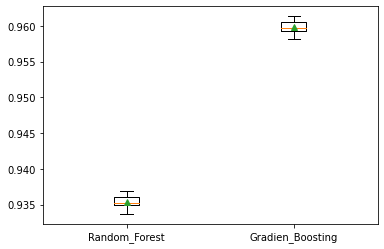

In [54]:
results, names = list(), list()
for name, model in models.items():
    scores = cv_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
# plot model performance for comparison
# plt.boxplot(results, labels=names, showmeans=True)
# plt.show()

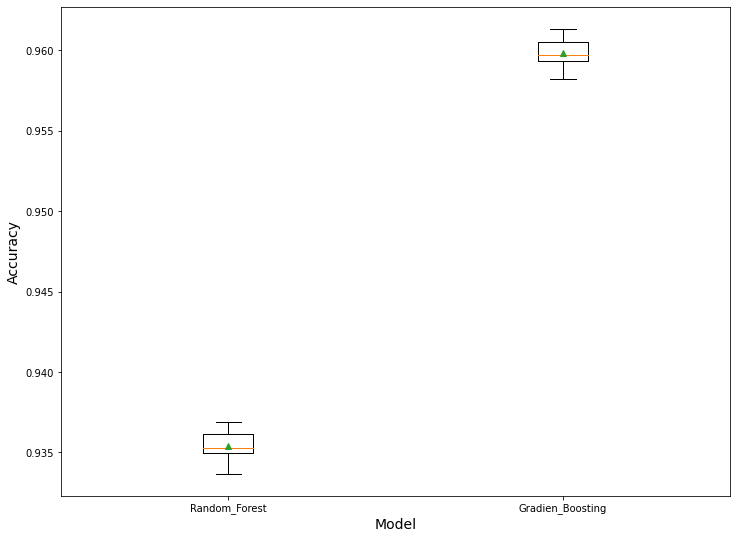

In [65]:
# plot model performance for comparison
plt.figure(figsize=(12,9))
plt.boxplot(results, labels=names, showmeans=True)
plt.ylabel('Accuracy', size=14)
plt.xlabel('Model', size=14)
plt.show()

## Random Forest

In [37]:
# # Uncomment di bawah ini untuk fitting data
# rf_clf.fit(X_train, y_train)
# y_pred_rf = rf_clf.predict(X_test)
# print('score %.4f' % evaluate_model(y_pred_rf))

score 0.9317408435569088


In [38]:
# # Uncomment di bawah ini untuk save model
# # Save model
# joblib.dump(rf_clf, 'random_forest.sav')

['random_forest.sav']

In [39]:
# load_model
random_forest = joblib.load('random_forest.sav')
result = random_forest.score(X_test, y_test)
print('score %.4f' % result)

0.9317408435569088


## Gradient Boosting

In [40]:
# # Uncomment di bawah ini untuk fitting data
# gb_clf.fit(X_train, y_train)
# y_pred_gb = gb_clf.predict(X_test)
# print('score %.4f' %  evaluate_model(y_pred_gb))

score 0.9317408435569088


In [47]:
# # Uncomment di bawah ini untuk save model
# # Save model
# joblib.dump(gb_clf, 'gradient_boosting.sav')

['gradient_boosting.sav']

In [48]:
# load_model
gradient_boosting = joblib.load('gradient_boosting.sav')
result = gradient_boosting.score(X_test, y_test)
print('score %.4f' % result)

0.9610011641443539


Dari kedua model tersebut, Gradient Boosting classifier terlihat lebih baik dalam memprediksi credit risk daripada Random Forest Classifier. Gradient Boosting Classifier memiliki tingkat akurasi 96,10%.Sedangkan Random Forest Classifier memiliki tingkat akurasi sebesar 93,17%